### 6️⃣ Polynomial Regression 
: 다항 회귀
- 1차 방정식을 고차다항식으로 변경하는 기법   
$x1 + x2 \rightarrow x1 + x2 + x1x2 + x1^2 + x2^2$

- sklearn.preprocession.PolynomialFeatures 사용

    🏠 집의 넓이와 집세의 상관 관계  
    
    $h_{\theta}(x) = \theta_{0} + \theta_{1}x_1 + \theta_{2}x_2 + \theta_{3}x_3$   

    $\downarrow x3 = x1 \times x2 $  

    $h_{\theta}(x) = \theta_{0} + \theta_{1}(depth) + \theta_{2}(frontag) + \theta_{3}(depth \times frontag)$

In [1]:
import numpy as np

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

degree : 고차원의 정도

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# degree : 2
poly = PolynomialFeatures(2)
poly.fit_transform(X)

# x0, x1, x2, x1^2, x1x2, x2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [3]:
# 교차만 나타나게
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

# x0, x1, x2, x1x2

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### 🌝 Dataset

linspace : 0 ~ 5까지 size만큼 구간 나누기

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x**2) + 1
    return (x,y)

In [9]:
def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x **2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

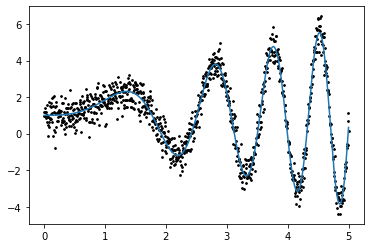

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [11]:
X.shape, y.shape

((1000,), (1000,))

- two dimension으로 바꾸기

In [12]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [14]:
X.shape, y.shape

((1000, 1), (1000, 1))

### 1. Linear Regrssion

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

현재 two dimension이기 때문에 one dimension으로 바꿔야함  
$\Rightarrow$ .flatten()

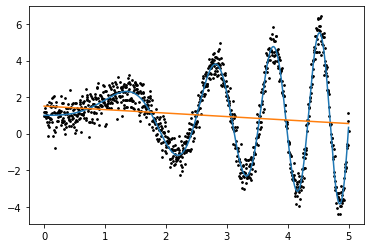

In [16]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

### 2. Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

$x_0, x_1, x_{1}^2$

In [19]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

# x0, x1, x1^2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04]])

In [20]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

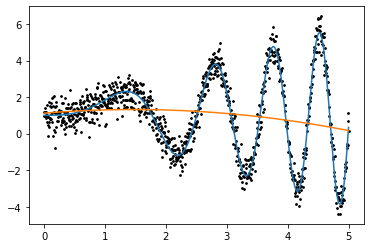

In [21]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

#### 💁‍♂️ Degree 증가 해보기

In [22]:
poly_features = PolynomialFeatures(degree=15)
X_poly = poly_features.fit_transform(X)
X_poly[:4]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04, 3.38514528e-06,
        5.08280073e-08, 7.63183292e-10, 1.14592086e-11, 1.720

In [23]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

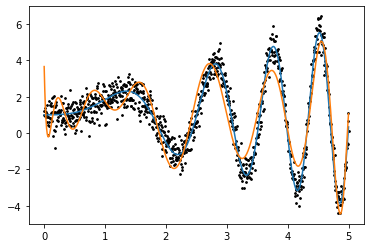

In [24]:
f_x, f_y = f(1000)

plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s =3, c = 'black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

### 🤷‍♀️ How to optimize
- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두다 써보자 (SGD는 느리고 쓸필요 없음!)
- Degree를 10~50까지 써보기
- 결과를 한눈에 정리해보기

In [25]:
def rmse(predictions, targets):
    return np.sqrt( ( (predictions - targets) ** 2 ).mean() )

In [27]:
poly_range = list(range(10,50)) # 10 ~50
poly_range[:5]

[10, 11, 12, 13, 14]

In [43]:
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

In [44]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings(action='ignore')

In [45]:
for poly_vlaue in poly_range:

    poly_features = PolynomialFeatures(degree = poly_vlaue)
    X_poly = poly_features.fit_transform(X)

    lr = LinearRegression()
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))

    ridge = Ridge()
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

In [48]:
import pandas as pd
from pandas import DataFrame

data = {'poly_range' : poly_range, 'lr_rmse' : rmse_lr_list, 'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}

df = DataFrame(data).set_index('poly_range')
df.head()

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.904391,2.196159,1.928157
11,1.895488,2.204075,1.908317
12,1.641889,2.208789,1.906555
13,1.354774,2.211596,1.878028
14,1.342047,2.213296,1.688355


In [49]:
df.min()

lr_rmse       0.537073
lasso_rmse    2.196159
ridge_rmse    0.527463
dtype: float64

ridge_rmse가 가장 작은 것을 확인할 수 있다.

In [50]:
df['ridge_rmse'].sort_values().head()

poly_range
23    0.527463
22    0.530157
24    0.533696
21    0.625522
26    0.691046
Name: ridge_rmse, dtype: float64

degree = 22일 때 가장 작은 것을 확인할 수 있다.

In [51]:
poly_features = PolynomialFeatures(degree = 22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge()
ridge.fit(X_poly, y)

Ridge()

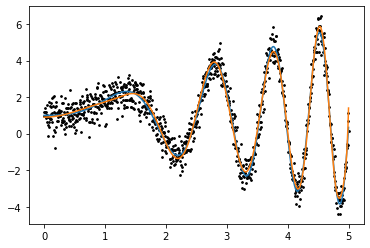

In [53]:
f_x , f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s= 3, c ='black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

fit_intercept = False로 해줄 경우

In [54]:
poly_features = PolynomialFeatures(degree = 22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

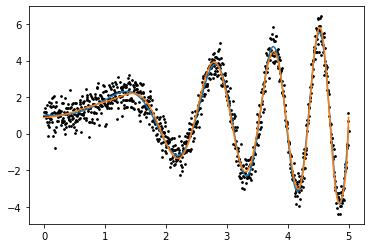

In [55]:
f_x , f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s= 3, c ='black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

📍 fit_intercept = True   
$\Rightarrow$ 상수항 $x_0$에 1을 자동으로 넣어줌

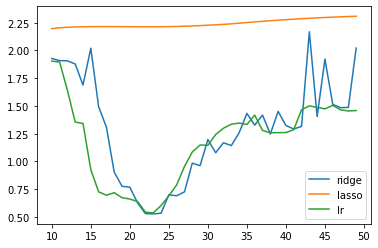

In [58]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lasso_rmse'], label = 'lasso')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.legend()

### 🤷‍♀️ Polynomial Features는 언제 사용하나?
- 한개 변수가 Y값과 비선형적인 관계가 있다고 의심  
: 일부분만 추출해서 사용가능
- 주기적인 패턴을 보이는 Series Data
- 모델 자체가 복잡해지면 해결가능한 부분이 많음  
$\Rightarrow$ SVM, Tree-based models

### 7️⃣ Performance Measure Techniques (Sampling Method)
: 성능 측정을 위해 데이터를 나누는 방법

#### ✔ <span style = 'background-color:#fff5b1'>Training - Validation - Test</span>  
6:2:2 비율로 많이 사용  

##### - Training : Model Building  
##### - Validation : Model Check   
##### - Test : Model Evaluation  

### 🍀 Validation Set
- <span style = 'color : red'>Test Set</span>은 Model이 생성 시 절대 <span style = 'color : red'>Training Set에 포함되지 않아야함</span>

- Test Set과 달리 Model 생성시 Model에 성능을 평가하기 위해 사용

- <span style = 'color : blue'>Hyper Parameter Turning 시 성능 평가를 위해 Overfitting 방지</span>

- Training 중간에 Model 성능 점검

### 🍀 K-fold cross validation
- 학습 DATA를 K번 나눠서 Test, Train을 실시  
$\rightarrow$ 평균값 사용, index 사용

- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

![kfold](./img/K-fold%20cross%20validation.PNG)

In [33]:
from sklearn import datasets
import warnings
warnings.filterwarnings(action ='ignore')

boston = datasets.load_boston()

In [34]:
X = boston.data
y = boston.target

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(X):
    print('TRAIN - ', 'len : ', len(train_index), train_index[:10] )
    print('TEST - ', 'len : ', len(test_index), test_index[:10])

TRAIN -  len :  455 [ 0  1  3  4  6  7  8  9 10 11]
TEST -  len :  51 [ 2  5 17 27 34 38 50 56 82 91]
TRAIN -  len :  455 [ 0  1  2  3  4  5  6  7  9 10]
TEST -  len :  51 [  8  12  35  41  44  72  79  94  99 102]
TRAIN -  len :  455 [ 0  1  2  3  4  5  6  7  8 11]
TEST -  len :  51 [  9  10  19  28  54  61  65  98 106 108]
TRAIN -  len :  455 [ 0  2  3  4  5  7  8  9 10 11]
TEST -  len :  51 [ 1  6 22 24 25 31 58 62 69 71]
TRAIN -  len :  455 [ 0  1  2  5  6  7  8  9 10 11]
TEST -  len :  51 [  3   4  14  29  30  53  74  81  96 103]
TRAIN -  len :  455 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  51 [ 37  52  63  70  77  83  87 101 109 121]
TRAIN -  len :  456 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  50 [ 11  13  18  42  46  59  84  85 119 129]
TRAIN -  len :  456 [ 0  1  2  3  4  5  6  8  9 10]
TEST -  len :  50 [ 7 23 36 39 45 47 55 57 60 67]
TRAIN -  len :  456 [0 1 2 3 4 5 6 7 8 9]
TEST -  len :  50 [15 20 32 40 48 49 66 68 73 76]
TRAIN -  len :  456 [ 1  2  3  4  5  6  7  8  9 10]
TEST -  le

In [9]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])

    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

# Average
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830233, 34.078246209259284)

#### 🧏‍♀️ 위보다 더 간단한 방법이 있음  
<span style = 'color : blue'>cross_val_score 함수</span>로, 한번에 해결 가능  

- sklearn은 pipeline등을 위해 'High is better'로 처리  
$\rightarrow$ MSE를 Negative로 변환

- 이로 인해 RMSE 지원 X

- cv : kfold split 횟수 만큼 cross validation score 계산

- neg : negative 작은게 좋은 걸로 인지

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830233, -34.078246209259284)

- cross_validate 보다는 cross_val_score를 자주 사용

In [18]:
from sklearn.model_selection import cross_validate
import numpy as np

lasso_regressor = Lasso(warm_start = False)
ridge_regressor = Ridge()

lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error')
ridge_scores

{'fit_time': array([0.002877  , 0.00214338, 0.00167084, 0.        , 0.00505877,
        0.        , 0.        , 0.01078391, 0.00099516, 0.00376391]),
 'score_time': array([0.00261712, 0.        , 0.00099587, 0.00400305, 0.00131106,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([  -9.31766315,  -12.60806897,  -10.79859434,  -36.6093648 ,
         -29.62109212,  -18.62598134,   -9.46641896, -168.49831117,
         -33.79749469,  -11.43947255])}

- 이 친구도 별로 안쓰는 기법 중 하나

### 🍀 Leave One Out(LOO)
- Simple cross validation $\rightarrow$ k = data size
- 한번에 한 개의 data만 Test set으로 사용함 $\rightarrow$ 총 k번 iteration
- 속도 오래 걸림

In [12]:
from sklearn.model_selection import LeaveOneOut

test = [1,2,3,4]
loo = LeaveOneOut()

for train, test in loo.split(test):
    print('%s %s' % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [13]:
loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv = loo, scoring = 'neg_mean_squared_error')

np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209975)

### 🍀 Validation set for parameter turning

- Validation set의 많은 이유 중 하나가 <span style = 'color:green'>Hyper parameter turning</span>

- Number of iterations (SGD), Number of branch (Tree-based) etc.

- <span style = 'color:blue'>Validation set의 성능으로 최적의 parameter 찾음</span>

- Validation set 결과와 Training set 결과의 차이가 벌어지면 Overfitting

![validation](./img/Validation%20set.PNG)

In [36]:
def rmse(predictions, targets):
    return np.sqrt(( (predictions - targets)**2 ).mean())

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

# Learning rate
eta0 = 0.00000001
max_iter = 10000

- cold_start : 아무것도 주어지지 않은 경우 추천
- warm_start : 이전에 학습한 coef, intercept가 주어진 경우 True

In [43]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

sgd_regressor = SGDRegressor(
    eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset, y_train_dataset, test_size = 0.2, random_state =42)

sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits = 100, shuffle = True)
#   for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append( rmse(y_pred, y_true) )

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append( rmse(y_pred, y_true) )
    model_list.append(sgd_regressor)    

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0 = eta0, max_iter = max_iter, warm_start =True, learning_rate = 'constant')

    sgd_regressor.fit(X_train, y_train, coef_init = coef, intercept_init = intercept)

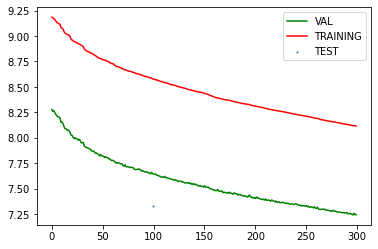

In [44]:
plt.plot( range(len(rmse_val_score)), rmse_val_score, c = 'g', label = 'VAL')
plt.plot( range(len(rmse_train_score)), rmse_train_score, c = 'r', label = 'TRAINING')
plt.scatter( 99, rmse(y_test, sgd_regressor.predict(X_test)), s=1, label = 'TEST')
plt.legend()
plt.show()

In [47]:
np.argsort(rmse_val_score)

array([296, 298, 299, 295, 294, 291, 292, 293, 297, 288, 289, 287, 285,
       286, 290, 284, 281, 283, 282, 280, 274, 278, 279, 276, 273, 277,
       275, 272, 270, 271, 269, 264, 265, 267, 263, 266, 268, 262, 260,
       259, 257, 253, 256, 261, 254, 255, 258, 251, 248, 252, 249, 245,
       247, 246, 250, 243, 242, 244, 238, 241, 237, 234, 236, 239, 240,
       235, 233, 231, 232, 230, 229, 225, 228, 224, 227, 221, 226, 222,
       219, 223, 215, 218, 220, 217, 211, 214, 213, 212, 209, 216, 207,
       208, 206, 205, 210, 204, 200, 198, 202, 203, 199, 196, 197, 192,
       201, 193, 190, 195, 188, 191, 189, 187, 186, 183, 194, 185, 184,
       178, 181, 182, 177, 180, 176, 174, 172, 179, 168, 170, 173, 171,
       175, 169, 166, 165, 164, 167, 162, 160, 161, 159, 158, 163, 157,
       156, 155, 153, 154, 152, 151, 149, 148, 147, 145, 150, 144, 146,
       143, 139, 141, 142, 137, 140, 138, 135, 131, 133, 136, 132, 134,
       130, 128, 129, 124, 126, 127, 125, 123, 122, 120, 121, 11

In [48]:
model_list[296].coef_

array([-0.07058477,  0.11170636, -0.05360604,  0.00505921,  0.0023909 ,
        0.09028812,  0.08457662,  0.01303585, -0.00389249,  0.00147842,
        0.04669124,  0.04795057, -0.2541542 ])

In [49]:
model_list[0].coef_

array([-0.00398131,  0.01850015, -0.00284557,  0.00016723,  0.00010955,
        0.00383557,  0.0064439 ,  0.00171029, -0.0017444 ,  0.00013931,
        0.00320834,  0.06068473, -0.00880882])

In [50]:
model_list[296].predict(X_test)

array([25.37129068, 26.89566191, 23.52204376, 19.37135722, 22.95296485,
       22.5507276 , 22.44648357, 21.39784581, 24.54641923, 23.63119263,
       23.4005391 , 24.21067102,  1.36490185, 21.31986392, 23.54445923,
       21.92771613, 22.17111094, 18.87940347, 31.59233674, 23.57356207,
       22.40045447, 25.86698742, 20.96691906, 23.55481281, 20.35684792,
       21.19006994, 21.11934002,  4.36488764, 23.54097344, 22.90100061,
       24.29438694, 23.18499007, 24.06169364, 24.93025603, 19.59478994,
       17.48530254, 24.50143385, 22.03717773, 20.85807119, 18.07273106,
       21.26708042, 28.45743935, 32.96204531, 21.85305622, 23.82077301,
       23.69063571, 22.04769179, 18.65261517, 23.15758064, 26.96992451,
       25.41836678, 24.54132352, 23.53949723, 24.76397058, 26.04181696,
       21.57010521, 24.27520793, 31.15074093, 22.2663954 , 24.00458336,
       24.76422976, 31.52818014, 20.60708587, 15.45772885, 28.21425325,
       22.83088578, 23.66480922, 24.51085356, 29.82346631,  4.22

- 비교

In [51]:
rmse( y_test, sgd_regressor.predict(X_test))

7.330692663351415

In [53]:
rmse(y_test, model_list[296].predict(X_test))

7.294805992939964

⛔ Standard scale된 X를 사용하여 학습을 한 모델이 더 좋다

#### ETC...
- RepeatedKFold : 중복이 포함된 K-Fold 생성
- LeavePOut : 한번에 P개를 뽑음 (Not LOO for one data)
- shuffleSplit : 독립적인(중복되는) data Sampling
- <span style = 'color : blue'>StratifiedKFold : Y값 비율에 따라 뽑음, 층화추출</span> ex) 암 환자 구분
- GroupKFold : 그룹별로 데이터 Sampling